In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import time

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person469_bacteria_1995.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person381_bacteria_1730.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1363_virus_2346.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person30_bacteria_150.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1469_bacteria_3824.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person57_bacteria_271.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person462_bacteria_1961.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person899_virus_1553.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1242_virus_2108.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person484_virus_986

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person538_bacteria_2268.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1438_virus_2452.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1317_virus_2273.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person752_virus_1377.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person71_bacteria_348.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1415_bacteria_3629.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person89_virus_168.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1119_virus_1844.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1619_bacteria_4262.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person58_bacteria_277.j

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0863-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0367-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0734-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0626-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0730-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0774-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0887-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0644-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0245-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0227-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0680-

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1442-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1436-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1431-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1440-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1438-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1320_bacteria_3344.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1019_virus_1707.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1493_bacteria_3896.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1180_virus_2015.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1504_virus_2614.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person783_virus_1414.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1176_bacteria_3123.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1098_bacteria_3039.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person605_bacteri

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person855_virus_1500.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1353_bacteria_3446.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person564_bacteria_2344.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person938_virus_1600.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1446_bacteria_3740.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person406_bacteria_1819.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person22_bacteria_76.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1092_virus_1811.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person383_bacteria_17

/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1650_virus_2852.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person22_virus_55.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person85_bacteria_417.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person79_virus_148.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person29_virus_64.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person123_bacteria_587.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person75_virus_136.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person153_bacteria_725.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person173_bacteria_831.jpeg
/kaggle/input/chest-xray-pneumonia/chest_x

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person48_bacteria_230.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1129_bacteria_3070.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person536_bacteria_2258.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person383_virus_767.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person157_virus_311.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1496_bacteria_3911.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1026_virus_1718.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person890_virus_1540.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1003_bacteria_2934.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1321_virus_2279.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1619_bacteria_4267.jpeg
/kaggle/inpu

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person946_bacteria_2871.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person21_bacteria_73.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1253_bacteria_3211.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person403_virus_803.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person765_bacteria_2669.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person816_bacteria_2727.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person284_virus_582.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person463_virus_953.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person582_bacteria_2405.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person423_bacteria_1854.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1345_bacteria_3425.jpeg
/kaggle/inpu

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1277-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0230-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0394-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0738-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0948-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0840-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0487-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0980-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0975-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0479-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0702-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1117-0001.jpeg

In [3]:
#Setting images directory
train_dir = '../input/chest-xray-pneumonia/chest_xray/chest_xray/train'
val_dir = '../input/chest-xray-pneumonia/chest_xray/chest_xray/val'
test_dir = '../input/chest-xray-pneumonia/chest_xray/chest_xray/test'

# Setting image and batch size
IMAGE_RES = 299
BATCH_SIZE = 64

# Loading images from directory
train = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES ,IMAGE_RES),
    shuffle=True,
    seed=78,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

# Loading images from directory
test = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES ,IMAGE_RES),
    shuffle=True,
    seed=78,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

# Loading images from directory
val = tf.keras.preprocessing.image_dataset_from_directory(
    directory = val_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES ,IMAGE_RES),
    shuffle=True,
    seed=78,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [4]:
# Looking at class names
class_names = np.array(train.class_names)

print(class_names)

['NORMAL' 'PNEUMONIA']


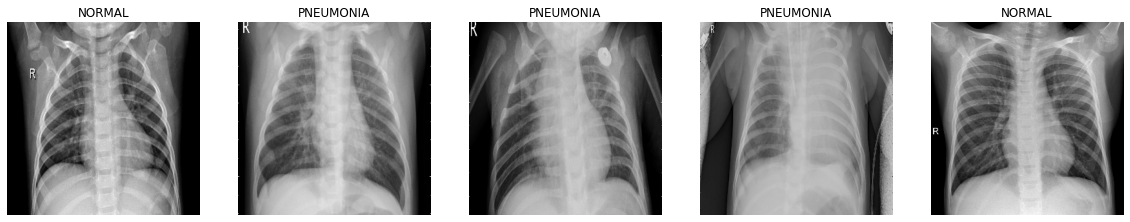

In [5]:
# Getting some examples
plt.figure( figsize=(20,20))
for images, labels in train.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
num_classes = len(train.class_names)

num_training_examples = 0
num_test_examples = 0
num_validation_examples = 0

for example in train:
  num_training_examples += 1

for example in test:
  num_test_examples += 1

for example in val:
  num_validation_examples += 1

print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training batchs: {}'.format(num_training_examples))
print('Total Number of Test batchs: {}'.format(num_test_examples))
print('Total Number of Validation batchs: {} \n'.format(num_validation_examples))

Total Number of Classes: 2
Total Number of Training batchs: 82
Total Number of Test batchs: 10
Total Number of Validation batchs: 1 



# Preprocessing

In [7]:
# rescaling image
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

training_set = train.shuffle(num_training_examples//4).map(format_image).prefetch(1)

test_set = test.map(format_image).prefetch(1)

validation_set = val.map(format_image).prefetch(1)

# Modeling

In [8]:
model_name = []
model_size = []
model_score = []
model_total_time = []
model_time_per_epoch = []

optimizer = tf.keras.optimizers.Adam(lr=1e-3)

EPOCHS = 20

# Create a callback that stops fitting when val loss do not decrease
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Light

In [9]:

import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import initializers, regularizers, constraints
from tensorflow.keras.layers import Activation

## New Approach: (2 conv2d operations)
class LightConv2D(Layer):
    def __init__(self,
        filters,
        kernel_size,
        strides=(1, 1),
        padding='SAME',
        data_format=None,
        dilation_rate=(1, 1),
        activation=None,
        use_bias=True,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        kernel_regularizer=tf.keras.regularizers.l2(1e-4),
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None,
        k=8):
        super(LightConv2D, self).__init__()

        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.data_format = data_format
        self.dilation_rate = dilation_rate
        self.activation = activation
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.k = k

    def _get_weight(self, shape, name=None, bias=False):
        if bias:
            W = self.add_weight(
                shape=shape,
                initializer=self.bias_regularizer,
                name=name,
                regularizer=self.bias_regularizer,
                constraint=self.bias_constraint)
        else:
            W = self.add_weight(
                shape=shape,
                name=name,
                initializer=self.kernel_initializer,
                regularizer=self.kernel_regularizer,
                constraint=self.kernel_constraint)

        return W

    def build(self, input_shape):
        k1 = self.kernel_size[0]
        k2 = self.kernel_size[1]
        c = input_shape[-1]
        f = self.filters
        k = self.k

        self.w1 = self._get_weight([k1, k2, c, k], name="w1")
        self.w2 = self._get_weight([k1, k2, k, f], name="w2")

        self.w1_shape = [k1, k2, c, k]
        self.w2_shape = [k1, k2, k, f]

        if self.use_bias:
            self.b1 = self._get_weight([k], name="b1", bias=True)
            self.b2 = self._get_weight([f], name="b2", bias=True)

    def call(self, x):
        w1 = self.w1
        x = tf.nn.conv2d(x, w1, [1, self.strides[0], self.strides[1], 1], self.padding)

        if self.use_bias == True:
            x = x + self.b1
        x = Activation("relu")(x)

        w2 = self.w2
        x = tf.nn.conv2d(x, w2, [1, self.strides[0], self.strides[1], 1], self.padding)

        if self.use_bias == True:
            x = x + self.b2

        if self.activation:
            x = Activation(self.activation)(x)

        return x

    def get_config(self):
        config = super(LightConv2D, self).get_config()

        config.update({'filters': self.filters})
        config.update({'kernel_size': self.kernel_size})
        config.update({'strides': self.strides})
        config.update({'padding': self.padding})
        config.update({'data_format': self.data_format})
        config.update({'dilation_rate': self.dilation_rate})
        config.update({'activation': self.activation})
        config.update({'use_bias': self.use_bias})
        config.update({'kernel_initializer': self.kernel_initializer})
        config.update({'bias_initializer': self.bias_initializer}),
        config.update({'kernel_regularizer': self.kernel_regularizer})
        config.update({'bias_regularizer': self.bias_regularizer })
        config.update({'activity_regularizer': self.activity_regularizer})
        config.update({'kernel_constraint': self.kernel_constraint})
        config.update({'bias_constraint': self.bias_constraint})
        config.update({'k': self.k})

        return config


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import *

In [11]:
def conv_block(x, f, k=1):
    x_init = x
    x = LightConv2D(f, (3, 3), padding="SAME", k=k)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = LightConv2D(f, (3, 3), padding="SAME", k=k)(x)
    x = BatchNormalization()(x)

    s = LightConv2D(f, (1, 1), padding="SAME", k=k)(x_init)
    s = BatchNormalization()(s)

    x = Add()([x, s])
    x = Activation("relu")(x)
    x = MaxPool2D((2, 2))(x)
    return x

### k = 1

In [12]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=1)
x = conv_block(x, 16, k=1)
x = conv_block(x, 32, k=1)
x = GlobalAveragePooling2D()(x)





In [13]:
x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d (LightConv2D)      (None, 299, 299, 8)  108         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 299, 299, 8)  32          light_conv2d[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 299, 299, 8)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 62s 528ms/step - loss: 0.6325 - accuracy: 0.6189 - val_loss: 0.7532 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.75323, saving model to training_2/cp.ckpt
Epoch 2/20
82/82 [==============================] - 58s 518ms/step - loss: 0.4821 - accuracy: 0.7694 - val_loss: 1.3000 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.75323
Epoch 3/20
82/82 [==============================] - 57s 513ms/step - loss: 0.3679 - accuracy: 0.8609 - val_loss: 4.2512 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.75323
Epoch 4/20
82/82 [==============================] - 58s 518ms/step - loss: 0.3026 - accuracy: 0.8829 - val_loss: 13.3098 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.75323
Epoch 5/20
82/82 [==============================] - 57s 513ms/step - loss: 0.2911 - accuracy: 0.8874 - val_loss: 10.7619 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 0.7532

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [15]:
print("time elapsed:",time_elapsed)

time elapsed: 1285.377644


In [16]:
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time per epoch: 64.2688822


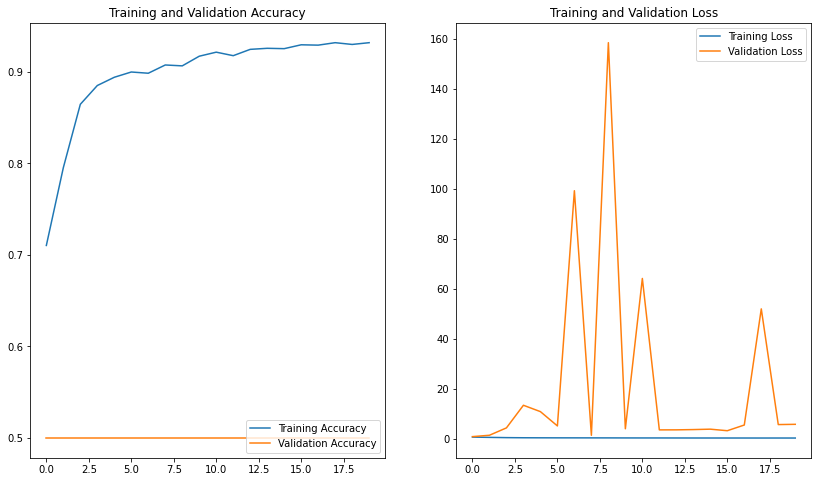

In [17]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 181ms/step - loss: 0.8384 - accuracy: 0.3750


[0.8384469747543335, 0.375]

In [19]:
print("Saving model to: LightLayers_k1.h5")
model.save("LightLayers_k1.h5")

print(
    "Size of the model : %.2f Mb"
    % (os.path.getsize("LightLayers_k1.h5") / float(2 ** 20))
)

model_name.append("LightLayers (K = 1)")
model_size.append(os.path.getsize("LightLayers_k1.h5") / float(2 ** 20))
model_score.append(model.evaluate(test_set)[1])
model_total_time.append(time_elapsed)
model_time_per_epoch.append(time_per_epoch)

Saving model to: LightLayers_k1.h5
Size of the model : 0.25 Mb
10/10 [==============================] - 6s 161ms/step - loss: 0.8384 - accuracy: 0.3750


### k = 2

In [20]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=2)
x = conv_block(x, 16, k=2)
x = conv_block(x, 32, k=2)
x = GlobalAveragePooling2D()(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d_9 (LightConv2D)    (None, 299, 299, 8)  208         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 299, 299, 8)  32          light_conv2d_9[0][0]             
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 299, 299, 8)  0           batch_normalization_9[0][0]      
____________________________________________________________________________________________

In [21]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 62s 530ms/step - loss: 0.5067 - accuracy: 0.7550 - val_loss: 0.7014 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.70145, saving model to training_3/cp.ckpt
Epoch 2/20
82/82 [==============================] - 58s 521ms/step - loss: 0.2471 - accuracy: 0.9082 - val_loss: 0.7047 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.70145
Epoch 3/20
82/82 [==============================] - 58s 524ms/step - loss: 0.2020 - accuracy: 0.9272 - val_loss: 1.2025 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.70145
Epoch 4/20
82/82 [==============================] - 58s 522ms/step - loss: 0.1901 - accuracy: 0.9291 - val_loss: 4.0644 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.70145
Epoch 5/20
82/82 [==============================] - 58s 521ms/step - loss: 0.1739 - accuracy: 0.9389 - val_loss: 4.3048 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 0.70145


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [22]:
print("time elapsed:",time_elapsed)
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time elapsed: 1312.594485
time per epoch: 65.62972425000001


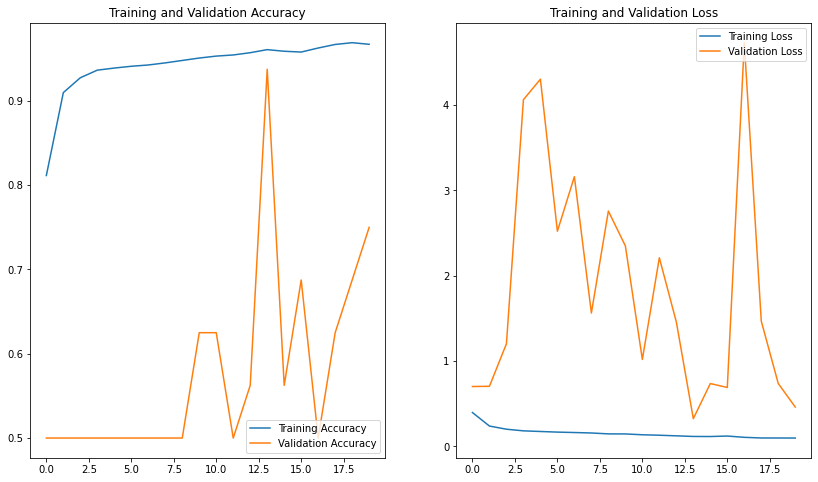

In [23]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 185ms/step - loss: 0.4276 - accuracy: 0.8349


[0.4275551736354828, 0.8349359035491943]

In [25]:
print("Saving model to: LightLayers_k2.h5")
model.save("LightLayers_k2.h5")

print(
    "Size of the model : %.2f Mb"
    % (os.path.getsize("LightLayers_k2.h5") / float(2 ** 20))
)

model_name.append("LightLayers (K = 2)")
model_size.append(os.path.getsize("LightLayers_k2.h5") / float(2 ** 20))
model_score.append(model.evaluate(test_set)[1])
model_total_time.append(time_elapsed)
model_time_per_epoch.append(time_per_epoch)

Saving model to: LightLayers_k2.h5
Size of the model : 0.40 Mb
10/10 [==============================] - 6s 157ms/step - loss: 0.4276 - accuracy: 0.8349


### k = 3 

In [26]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=3)
x = conv_block(x, 16, k=3)
x = conv_block(x, 32, k=3)
x = GlobalAveragePooling2D()(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_4/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d_18 (LightConv2D)   (None, 299, 299, 8)  308         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 299, 299, 8)  32          light_conv2d_18[0][0]            
__________________________________________________________________________________________________
activation_14 (Activation)      (None, 299, 299, 8)  0           batch_normalization_18[0][0]     
____________________________________________________________________________________________

In [27]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 62s 540ms/step - loss: 0.3440 - accuracy: 0.8434 - val_loss: 1.0493 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 1.04933, saving model to training_4/cp.ckpt
Epoch 2/20
82/82 [==============================] - 59s 527ms/step - loss: 0.2176 - accuracy: 0.9184 - val_loss: 0.9209 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 1.04933 to 0.92090, saving model to training_4/cp.ckpt
Epoch 3/20
82/82 [==============================] - 59s 531ms/step - loss: 0.1928 - accuracy: 0.9293 - val_loss: 1.0544 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.92090
Epoch 4/20
82/82 [==============================] - 59s 528ms/step - loss: 0.1665 - accuracy: 0.9403 - val_loss: 1.2405 - val_accuracy: 0.3125

Epoch 00004: val_loss did not improve from 0.92090
Epoch 5/20
82/82 [==============================] - 59s 531ms/step - loss: 0.1452 - accuracy: 0.9523 - val_loss: 3.3716 - val_accuracy: 0.5000

Epoch 00005

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [28]:
print("time elapsed:",time_elapsed)
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time elapsed: 1335.5368550000003
time per epoch: 66.77684275000001


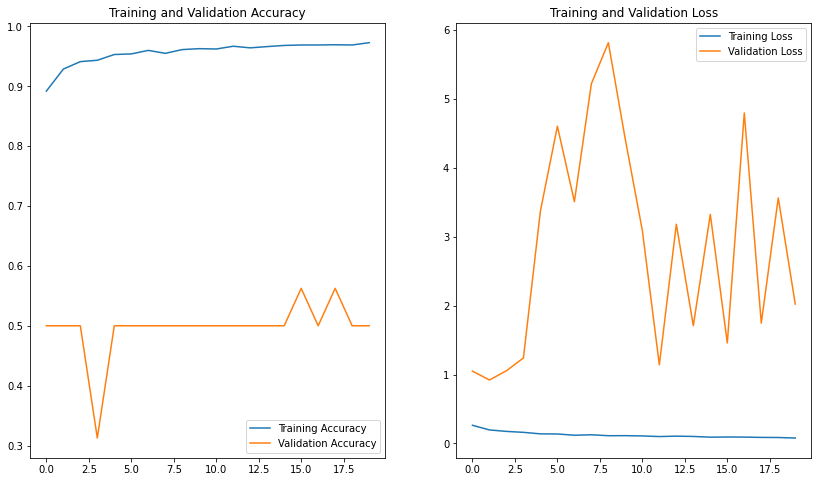

In [29]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 179ms/step - loss: 0.7449 - accuracy: 0.6250


[0.7449437379837036, 0.625]

In [31]:
print("Saving model to: LightLayers_k3.h5")
model.save("LightLayers_k3.h5")

print(
    "Size of the model : %.2f Mb"
    % (os.path.getsize("LightLayers_k3.h5") / float(2 ** 20))
)

model_name.append("LightLayers (K = 3)")
model_size.append(os.path.getsize("LightLayers_k3.h5") / float(2 ** 20))
model_score.append(model.evaluate(test_set)[1])
model_total_time.append(time_elapsed)
model_time_per_epoch.append(time_per_epoch)

Saving model to: LightLayers_k3.h5
Size of the model : 0.56 Mb
10/10 [==============================] - 5s 160ms/step - loss: 0.7449 - accuracy: 0.6250


### k = 4

In [32]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=4)
x = conv_block(x, 16, k=4)
x = conv_block(x, 32, k=4)
x = GlobalAveragePooling2D()(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_5/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d_27 (LightConv2D)   (None, 299, 299, 8)  408         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_27 (BatchNo (None, 299, 299, 8)  32          light_conv2d_27[0][0]            
__________________________________________________________________________________________________
activation_21 (Activation)      (None, 299, 299, 8)  0           batch_normalization_27[0][0]     
____________________________________________________________________________________________

In [33]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 64s 562ms/step - loss: 0.5152 - accuracy: 0.7418 - val_loss: 0.9214 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.92144, saving model to training_5/cp.ckpt
Epoch 2/20
82/82 [==============================] - 61s 550ms/step - loss: 0.2027 - accuracy: 0.9290 - val_loss: 1.3779 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.92144
Epoch 3/20
82/82 [==============================] - 59s 542ms/step - loss: 0.1642 - accuracy: 0.9442 - val_loss: 2.1887 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.92144
Epoch 4/20
82/82 [==============================] - 59s 534ms/step - loss: 0.1524 - accuracy: 0.9520 - val_loss: 1.0757 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.92144
Epoch 5/20
82/82 [==============================] - 60s 537ms/step - loss: 0.1349 - accuracy: 0.9568 - val_loss: 1.6462 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 0.92144


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [34]:
print("time elapsed:",time_elapsed)
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time elapsed: 1344.6364760000001
time per epoch: 67.2318238


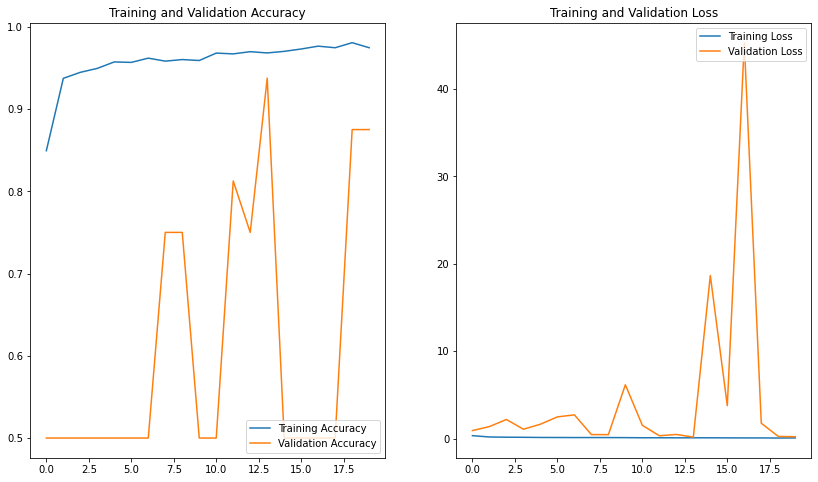

In [35]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 187ms/step - loss: 0.3526 - accuracy: 0.8702


[0.3526189625263214, 0.870192289352417]

In [37]:
print("Saving model to: LightLayers_k4.h5")
model.save("LightLayers_k4.h5")

print(
    "Size of the model : %.2f Mb"
    % (os.path.getsize("LightLayers_k4.h5") / float(2 ** 20))
)

model_name.append("LightLayers (K = 4)")
model_size.append(os.path.getsize("LightLayers_k4.h5") / float(2 ** 20))
model_score.append(model.evaluate(test_set)[1])
model_total_time.append(time_elapsed)
model_time_per_epoch.append(time_per_epoch)

Saving model to: LightLayers_k4.h5
Size of the model : 0.74 Mb
10/10 [==============================] - 6s 165ms/step - loss: 0.3526 - accuracy: 0.8702


### k = 5

In [38]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=5)
x = conv_block(x, 16, k=5)
x = conv_block(x, 32, k=5)
x = GlobalAveragePooling2D()(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_6/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d_36 (LightConv2D)   (None, 299, 299, 8)  508         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 299, 299, 8)  32          light_conv2d_36[0][0]            
__________________________________________________________________________________________________
activation_28 (Activation)      (None, 299, 299, 8)  0           batch_normalization_36[0][0]     
____________________________________________________________________________________________

In [39]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 64s 553ms/step - loss: 0.3472 - accuracy: 0.8652 - val_loss: 1.2040 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 1.20404, saving model to training_6/cp.ckpt
Epoch 2/20
82/82 [==============================] - 60s 548ms/step - loss: 0.2238 - accuracy: 0.9180 - val_loss: 2.6181 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 1.20404
Epoch 3/20
82/82 [==============================] - 60s 542ms/step - loss: 0.1768 - accuracy: 0.9381 - val_loss: 1.1715 - val_accuracy: 0.5000

Epoch 00003: val_loss improved from 1.20404 to 1.17148, saving model to training_6/cp.ckpt
Epoch 4/20
82/82 [==============================] - 59s 538ms/step - loss: 0.1513 - accuracy: 0.9553 - val_loss: 1.2641 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 1.17148
Epoch 5/20
82/82 [==============================] - 60s 548ms/step - loss: 0.1368 - accuracy: 0.9583 - val_loss: 2.4298 - val_accuracy: 0.5000

Epoch 00005

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [40]:
print("time elapsed:",time_elapsed)
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time elapsed: 1362.080559
time per epoch: 68.10402795


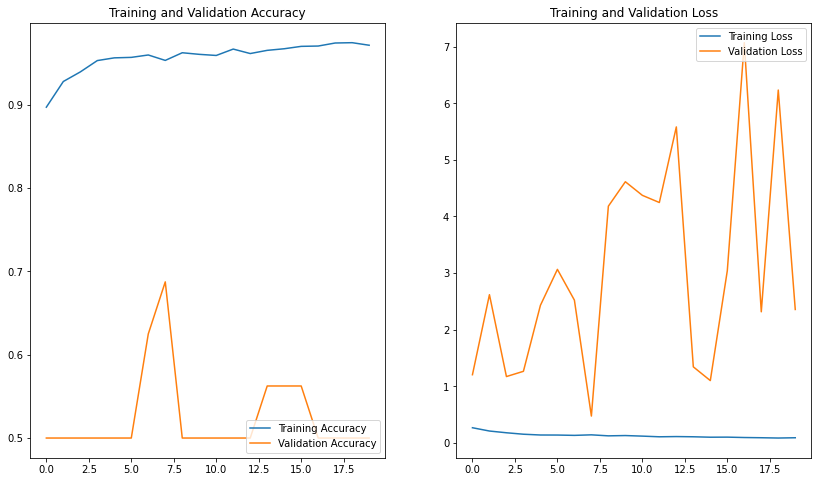

In [41]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 189ms/step - loss: 0.5554 - accuracy: 0.8061


[0.5554301738739014, 0.8060897588729858]

In [43]:
print("Saving model to: LightLayers_k5.h5")
model.save("LightLayers_k5.h5")

print(
    "Size of the model : %.2f Mb"
    % (os.path.getsize("LightLayers_k5.h5") / float(2 ** 20))
)

model_name.append("LightLayers (K = 5)")
model_size.append(os.path.getsize("LightLayers_k5.h5") / float(2 ** 20))
model_score.append(model.evaluate(test_set)[1])
model_total_time.append(time_elapsed)
model_time_per_epoch.append(time_per_epoch)

Saving model to: LightLayers_k5.h5
Size of the model : 0.93 Mb
10/10 [==============================] - 5s 164ms/step - loss: 0.5554 - accuracy: 0.8061


# From scratch

In [44]:
# Setting image and batch size
IMAGE_RES = 299
BATCH_SIZE = 8

# creating model
model = tf.keras.models.Sequential([
    # bloc 1
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(IMAGE_RES,IMAGE_RES, 3)),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    # bloc 2
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    # bloc 3
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(2, activation= "softmax")

    
])

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],steps_per_execution=32)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 8)       224       
_________________________________________________________________
batch_normalization_45 (Batc (None, 297, 297, 8)       32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 295, 295, 8)       584       
_________________________________________________________________
batch_normalization_46 (Batc (None, 295, 295, 8)       32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 293, 293, 8)       584       
_________________________________________________________________
batch_normalization_47 (Batc (None, 293, 293, 8)       32        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 146, 146, 8)       0

In [45]:
# Create a callback that saves the model's weights
checkpoint_path = "training_7/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)




In [46]:
time_start = time.clock()


history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )


time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 60s 734ms/step - loss: 0.2798 - accuracy: 0.8845 - val_loss: 1.9461 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 1.94605, saving model to training_7/cp.ckpt
Epoch 2/20
82/82 [==============================] - 56s 687ms/step - loss: 0.1912 - accuracy: 0.9284 - val_loss: 2.9406 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 1.94605
Epoch 3/20
82/82 [==============================] - 56s 677ms/step - loss: 0.1582 - accuracy: 0.9408 - val_loss: 4.0073 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 1.94605
Epoch 4/20
82/82 [==============================] - 56s 686ms/step - loss: 0.1461 - accuracy: 0.9447 - val_loss: 3.2876 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 1.94605
Epoch 5/20
82/82 [==============================] - 56s 683ms/step - loss: 0.1400 - accuracy: 0.9526 - val_loss: 5.8968 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 1.94605


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


In [47]:
print("time elapsed:",time_elapsed)

time elapsed: 1107.789358


In [48]:
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time per epoch: 55.3894679


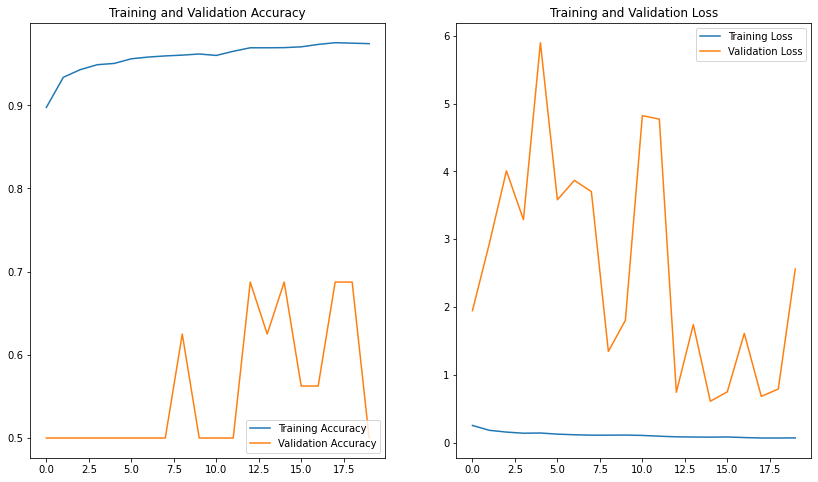

In [49]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 563ms/step - loss: 0.4181 - accuracy: 0.8606


[0.41808363795280457, 0.8605769276618958]

In [51]:
print("Saving model to: Conv2D.h5 ")
model.save("Conv2D.h5")

print(
    "Size of the model : %.2f Mb"
    % (os.path.getsize("Conv2D.h5") / float(2 ** 20))
)

model_name.append("Conv2D")
model_size.append(os.path.getsize("Conv2D.h5") / float(2 ** 20))
model_score.append(model.evaluate(test_set)[1])
model_total_time.append(time_elapsed)
model_time_per_epoch.append(time_per_epoch)

Saving model to: Conv2D.h5 
Size of the model : 1.30 Mb
10/10 [==============================] - 6s 560ms/step - loss: 0.4181 - accuracy: 0.8606


# Transfert Learning (Inception V3)

In [52]:
import tensorflow_hub as hub

# Loading model from tensorflow hub
URL = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

# Setting pretrained model to no trainable
feature_extractor.trainable = False

# creating model
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(num_classes, activation = "softmax")
])
# compile model
model.compile(
  optimizer=optimizer,
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [53]:
time_start = time.clock()

# fitting model
history = model.fit(training_set,
                    epochs=EPOCHS,
                    validation_data=validation_set,
                    callbacks=[cp_callback])

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 60s 507ms/step - loss: 0.4421 - accuracy: 0.8235 - val_loss: 0.4353 - val_accuracy: 0.8125

Epoch 00001: val_loss improved from inf to 0.43529, saving model to training_1/cp.ckpt
Epoch 2/20
82/82 [==============================] - 56s 490ms/step - loss: 0.1318 - accuracy: 0.9481 - val_loss: 0.2797 - val_accuracy: 0.8750

Epoch 00002: val_loss improved from 0.43529 to 0.27966, saving model to training_1/cp.ckpt
Epoch 3/20
82/82 [==============================] - 56s 493ms/step - loss: 0.1192 - accuracy: 0.9566 - val_loss: 0.3274 - val_accuracy: 0.8125

Epoch 00003: val_loss did not improve from 0.27966
Epoch 4/20
82/82 [==============================] - 55s 487ms/step - loss: 0.1019 - accuracy: 0.9606 - val_loss: 0.3294 - val_accuracy: 0.8750

Epoch 00004: val_loss did not improve from 0.27966
Epoch 5/20
82/82 [==============================] - 56s 492ms/step - loss: 0.0973 - accuracy: 0.9640 - val_loss: 0.3647 - val_accuracy: 0.8750

Epoch 00005

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [54]:
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time elapsed:",time_elapsed)

print("time per epoch:", time_per_epoch)

time elapsed: 1106.441592000001
time per epoch: 55.32207960000005


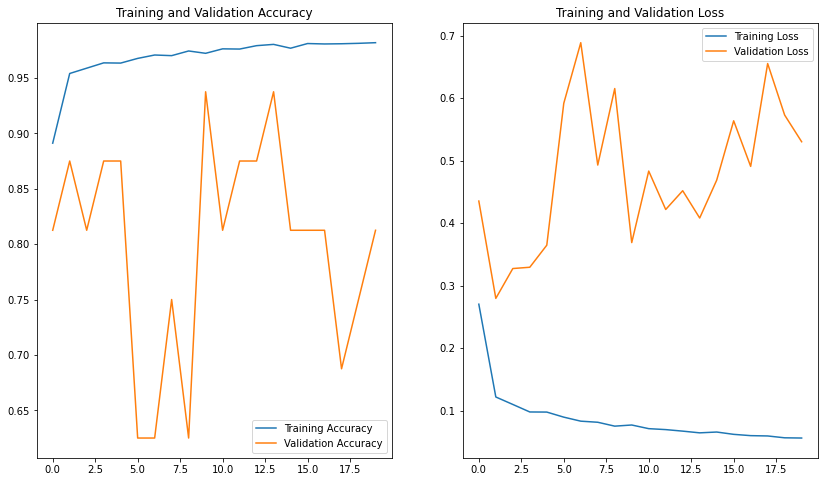

In [55]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

print("Saving model to: transfert_learning.h5 ")
model.save("transfert_learning.h5")

print(
    "Size of the model : %.2f Mb"
    % (os.path.getsize("transfert_learning.h5") / float(2 ** 20))
)

print("Saving model to: transfert_learning.h5 ")
model.save("transfert_learning.h5")

print(
    "Size of the model : %.2f Mb"
    % (os.path.getsize("transfert_learning.h5") / float(2 ** 20))
)

model_name.append("transfert_learning")
model_size.append(os.path.getsize("transfert_learning.h5") / float(2 ** 20))
model_score.append(model.evaluate(test_set)[1])
model_total_time.append(time_elapsed)
model_time_per_epoch.append(time_per_epoch)

10/10 [==============================] - 6s 265ms/step - loss: 0.4653 - accuracy: 0.8013
Saving model to: transfert_learning.h5 
Size of the model : 84.69 Mb
Saving model to: transfert_learning.h5 
Size of the model : 84.69 Mb
10/10 [==============================] - 6s 187ms/step - loss: 0.4653 - accuracy: 0.8013


# Performances

In [57]:
nb_params = [ 2753 , 4600 , 6447 , 8294 , 10141 ,31074, 21806882 ]
train_params = [ 2417 , 4264 , 6111 , 7958 ,9805 , 30738 ,4098 ]


    
temp = { "Model" : model_name ,
        "Total params" : nb_params,
        "Trainable params" : train_params,
        "Size" : model_size,
        "Accuracy" : model_score,
        "Total time": model_total_time,
        "Time per epoch" : model_time_per_epoch
        
    
}
print("Number of tested models:",len(model_name))

Number of tested models: 7


In [58]:
perfs = pd.DataFrame(temp)
print(perfs)

                 Model  Total params  Trainable params       Size  Accuracy  \
0  LightLayers (K = 1)          2753              2417   0.251328  0.375000   
1  LightLayers (K = 2)          4600              4264   0.401146  0.834936   
2  LightLayers (K = 3)          6447              6111   0.562813  0.625000   
3  LightLayers (K = 4)          8294              7958   0.739403  0.870192   
4  LightLayers (K = 5)         10141              9805   0.930847  0.806090   
5               Conv2D         31074             30738   1.300407  0.860577   
6   transfert_learning      21806882              4098  84.690468  0.801282   

    Total time  Time per epoch  
0  1285.377644       64.268882  
1  1312.594485       65.629724  
2  1335.536855       66.776843  
3  1344.636476       67.231824  
4  1362.080559       68.104028  
5  1107.789358       55.389468  
6  1106.441592       55.322080  


In [59]:
perfs.head(len(perfs))

,Model,Total params,Trainable params,Size,Accuracy,Total time,Time per epoch
0,LightLayers (K = 1),2753,2417,0.251328,0.375000,1285.377644,64.268882
1,LightLayers (K = 2),4600,4264,0.401146,0.834936,1312.594485,65.629724
2,LightLayers (K = 3),6447,6111,0.562813,0.625000,1335.536855,66.776843
3,LightLayers (K = 4),8294,7958,0.739403,0.870192,1344.636476,67.231824
4,LightLayers (K = 5),10141,9805,0.930847,0.806090,1362.080559,68.104028
5,Conv2D,31074,30738,1.300407,0.860577,1107.789358,55.389468
6,transfert_learning,21806882,4098,84.690468,0.801282,1106.441592,55.322080


In [60]:
perfs.describe()

,Total params,Trainable params,Size,Accuracy,Total time,Time per epoch
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.124313e+06,9341.571429,12.696630,0.739011,1264.922424,63.246121
std,8.238244e+06,9760.458030,31.748201,0.180309,110.512780,5.525639
min,2.753000e+03,2417.000000,0.251328,0.375000,1106.441592,55.322080
25%,5.523500e+03,4181.000000,0.481979,0.713141,1196.583501,59.829175
50%,8.294000e+03,6111.000000,0.739403,0.806090,1312.594485,65.629724
75%,2.060750e+04,8881.500000,1.115627,0.847756,1340.086666,67.004333
max,2.180688e+07,30738.000000,84.690468,0.870192,1362.080559,68.104028


In [61]:
cols = perfs.columns.drop("Model")
print(cols)

Index(['Total params', 'Trainable params', 'Size', 'Accuracy', 'Total time',
       'Time per epoch'],
      dtype='object')


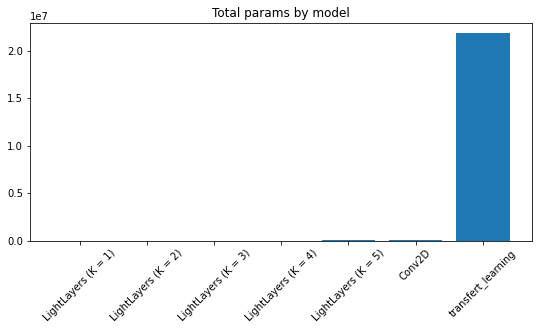

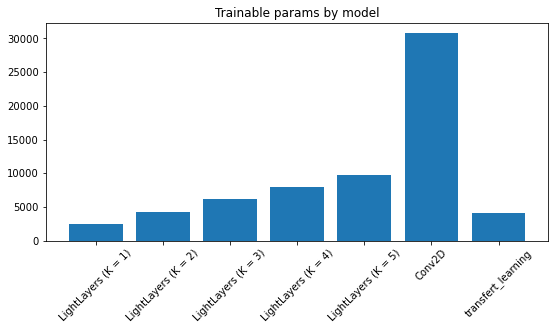

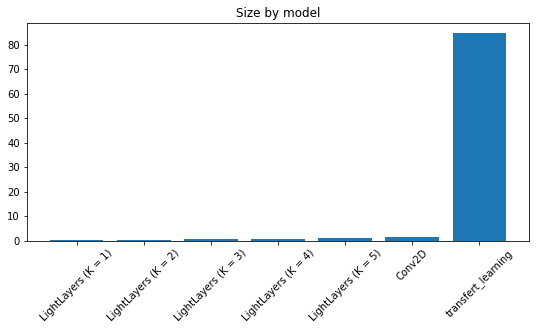

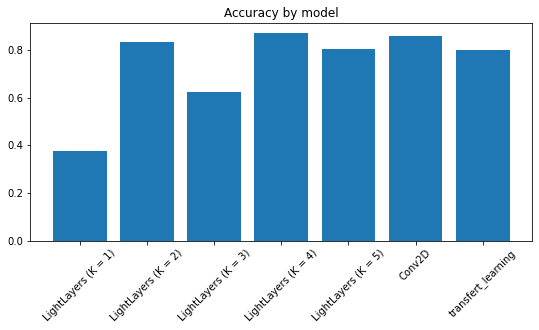

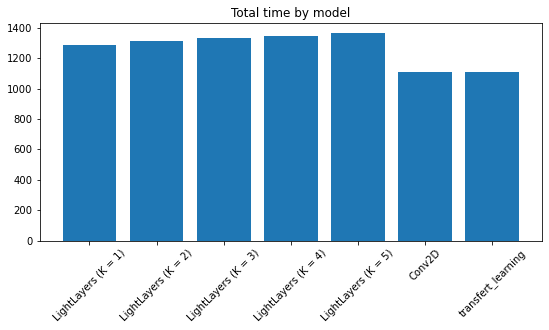

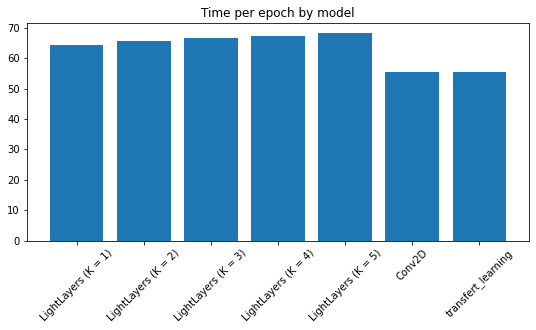

In [62]:
for col in cols:
    
    # ploting 
    plt.figure(figsize=(9,4))
    plt.bar(perfs["Model"],perfs[col])
    plt.title(col +" by model")
    plt.xticks(rotation=45)
    plt.show()

# Dropout layer

## k = 5

In [63]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=5)
x = conv_block(x, 16, k=5)
x = conv_block(x, 32, k=5)
x = GlobalAveragePooling2D()(x)

x = Dropout(0.25)(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_7/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d_45 (LightConv2D)   (None, 299, 299, 8)  508         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_54 (BatchNo (None, 299, 299, 8)  32          light_conv2d_45[0][0]            
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 299, 299, 8)  0           batch_normalization_54[0][0]     
____________________________________________________________________________________________

In [64]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 62s 540ms/step - loss: 0.4111 - accuracy: 0.8036 - val_loss: 4.7487 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 4.74866, saving model to training_7/cp.ckpt
Epoch 2/20
82/82 [==============================] - 59s 538ms/step - loss: 0.2617 - accuracy: 0.8907 - val_loss: 5.5924 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 4.74866
Epoch 3/20
82/82 [==============================] - 60s 538ms/step - loss: 0.2188 - accuracy: 0.9170 - val_loss: 6.1258 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 4.74866
Epoch 4/20
82/82 [==============================] - 59s 537ms/step - loss: 0.1886 - accuracy: 0.9383 - val_loss: 5.7956 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 4.74866
Epoch 5/20
82/82 [==============================] - 60s 548ms/step - loss: 0.1829 - accuracy: 0.9366 - val_loss: 5.2782 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 4.74866


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [65]:
print("time elapsed:",time_elapsed)
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time elapsed: 1361.0232880000003
time per epoch: 68.05116440000002


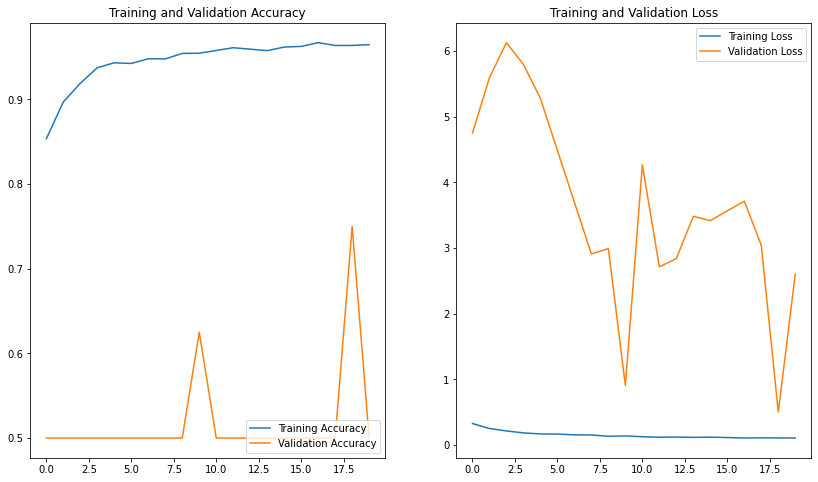

In [66]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 161ms/step - loss: 0.4232 - accuracy: 0.8670


[0.4232421815395355, 0.8669871687889099]

## k = 3

In [68]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=3)
x = conv_block(x, 16, k=3)
x = conv_block(x, 32, k=3)
x = GlobalAveragePooling2D()(x)

x = Dropout(0.25)(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_8/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d_54 (LightConv2D)   (None, 299, 299, 8)  308         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 299, 299, 8)  32          light_conv2d_54[0][0]            
__________________________________________________________________________________________________
activation_42 (Activation)      (None, 299, 299, 8)  0           batch_normalization_63[0][0]     
____________________________________________________________________________________________

In [69]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


82/82 [==============================] - 62s 537ms/step - loss: 0.4160 - accuracy: 0.8340 - val_loss: 2.2504 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 2.25043, saving model to training_8/cp.ckpt
Epoch 2/20
82/82 [==============================] - 59s 533ms/step - loss: 0.2551 - accuracy: 0.8930 - val_loss: 3.3335 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 2.25043
Epoch 3/20
82/82 [==============================] - 59s 540ms/step - loss: 0.2364 - accuracy: 0.9045 - val_loss: 4.3099 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 2.25043
Epoch 4/20
82/82 [==============================] - 59s 538ms/step - loss: 0.2331 - accuracy: 0.9039 - val_loss: 2.2835 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 2.25043
Epoch 5/20
82/82 [==============================] - 58s 531ms/step - loss: 0.2007 - accuracy: 0.9267 - val_loss: 2.8755 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 2.25043


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [70]:
print("time elapsed:",time_elapsed)
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time elapsed: 1340.3239030000004
time per epoch: 67.01619515000002


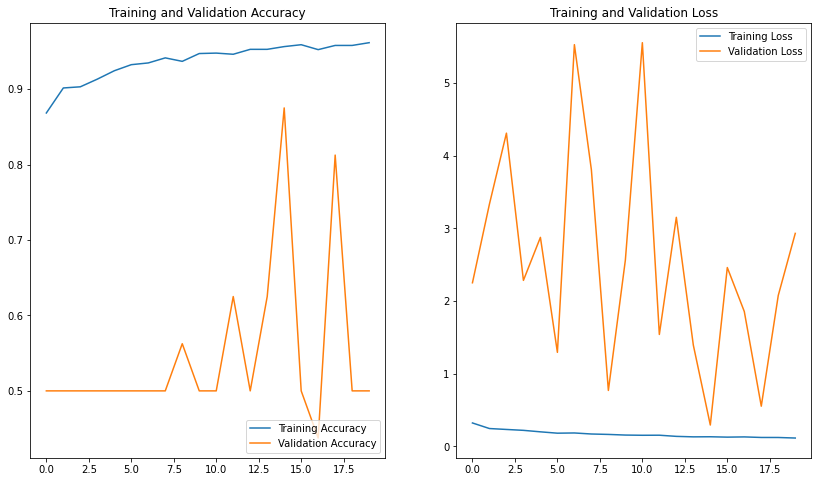

In [71]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 182ms/step - loss: 0.3347 - accuracy: 0.8510


[0.33471840620040894, 0.8509615659713745]

## Learning rate

In [73]:
import kerastuner as kt

inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=3)
x = conv_block(x, 16, k=3)
x = conv_block(x, 32, k=3)
x = GlobalAveragePooling2D()(x)

x = Dropout(0.25)(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

def model_builder(hp):
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4,1e-5])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model


tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(training_set, epochs=EPOCHS, validation_data = validation_set, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")




The hyperparameter search is complete. The optimal learning rate for the optimizer
is 0.1.



# Image augmentation

In [74]:
# creating image generator for train split
image_gen_train = ImageDataGenerator(
      rescale=1./255,      
      horizontal_flip=True)



# creating train augmented split
training_set  = image_gen_train.flow_from_directory(directory = train_dir,
    
    batch_size=BATCH_SIZE,
    target_size=(IMAGE_RES ,IMAGE_RES),
    shuffle=True,
    seed=78,
    class_mode='binary',
    )

Found 5216 images belonging to 2 classes.


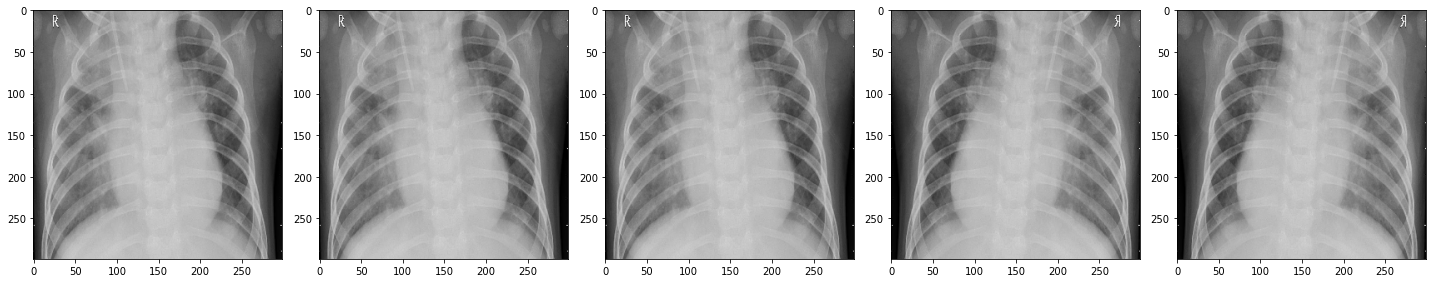

In [75]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
# plotting augmented images
augmented_images = [training_set[0][0][0] for i in range(5)]
plotImages(augmented_images)

## k = 5

In [76]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=5)
x = conv_block(x, 16, k=5)
x = conv_block(x, 32, k=5)
x = GlobalAveragePooling2D()(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_9/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d (LightConv2D)      (None, 299, 299, 8)  508         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 299, 299, 8)  32          light_conv2d[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 299, 299, 8)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [77]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


652/652 [==============================] - 67s 100ms/step - loss: 0.4070 - accuracy: 0.8205 - val_loss: 1.2234 - val_accuracy: 0.5625

Epoch 00001: val_loss improved from inf to 1.22344, saving model to training_9/cp.ckpt
Epoch 2/20
652/652 [==============================] - 65s 100ms/step - loss: 0.2920 - accuracy: 0.8765 - val_loss: 2.9082 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 1.22344
Epoch 3/20
652/652 [==============================] - 65s 100ms/step - loss: 0.2668 - accuracy: 0.8941 - val_loss: 4.5663 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 1.22344
Epoch 4/20
652/652 [==============================] - 65s 100ms/step - loss: 0.2442 - accuracy: 0.9023 - val_loss: 1.6980 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 1.22344
Epoch 5/20
652/652 [==============================] - 65s 99ms/step - loss: 0.2130 - accuracy: 0.9223 - val_loss: 1.4603 - val_accuracy: 0.6250

Epoch 00005: val_loss did not improve from

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [78]:
print("time elapsed:",time_elapsed)
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time elapsed: 1620.8356609999992
time per epoch: 81.04178304999996


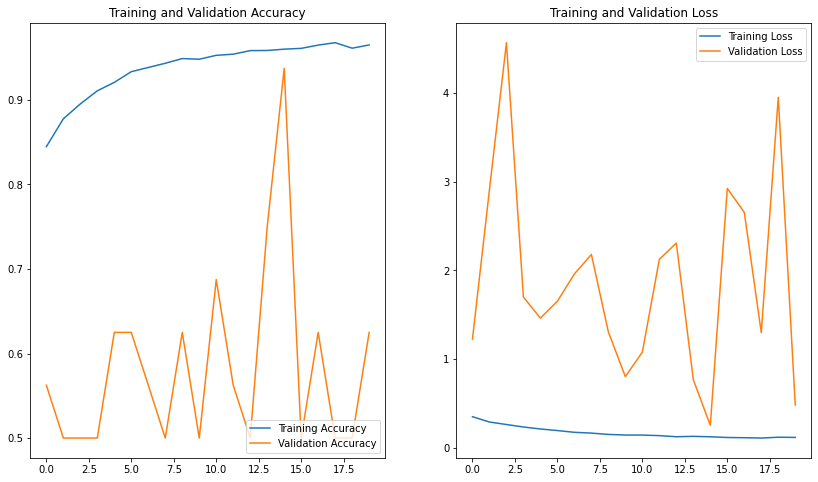

In [79]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [80]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 6s 180ms/step - loss: 0.4875 - accuracy: 0.7981


[0.4874620735645294, 0.7980769276618958]

> # k = 3

In [81]:
inputs = Input((IMAGE_RES ,IMAGE_RES, 3))
x = inputs

x = conv_block(x, 8, k=3)
x = conv_block(x, 16, k=3)
x = conv_block(x, 32, k=3)
x = GlobalAveragePooling2D()(x)

x = Dense(2)(x)
x = Activation('softmax')(x)

model = tf.keras.models.Model(inputs, x)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Create a callback that saves the model's weights
checkpoint_path = "training_10/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
light_conv2d_9 (LightConv2D)    (None, 299, 299, 8)  308         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 299, 299, 8)  32          light_conv2d_9[0][0]             
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 299, 299, 8)  0           batch_normalization_9[0][0]      
____________________________________________________________________________________________

In [82]:
time_start = time.clock()

history = model.fit(training_set,
    epochs=EPOCHS,
    validation_data=validation_set,
    callbacks=[cp_callback]
    )

time_elapsed = (time.clock() - time_start)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


652/652 [==============================] - 67s 99ms/step - loss: 0.3650 - accuracy: 0.8361 - val_loss: 3.1167 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 3.11674, saving model to training_10/cp.ckpt
Epoch 2/20
652/652 [==============================] - 65s 100ms/step - loss: 0.2870 - accuracy: 0.8752 - val_loss: 2.2379 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 3.11674 to 2.23791, saving model to training_10/cp.ckpt
Epoch 3/20
652/652 [==============================] - 65s 100ms/step - loss: 0.2473 - accuracy: 0.9004 - val_loss: 1.6460 - val_accuracy: 0.5000

Epoch 00003: val_loss improved from 2.23791 to 1.64595, saving model to training_10/cp.ckpt
Epoch 4/20
652/652 [==============================] - 65s 99ms/step - loss: 0.2021 - accuracy: 0.9193 - val_loss: 1.8379 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 1.64595
Epoch 5/20
652/652 [==============================] - 65s 99ms/step - loss: 0.1820 - accuracy: 0.9373 - va

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


In [83]:
print("time elapsed:",time_elapsed)
time_per_epoch = time_elapsed/len(history.history['loss'])
print("time per epoch:", time_per_epoch)

time elapsed: 1599.8600029999998
time per epoch: 79.99300014999999


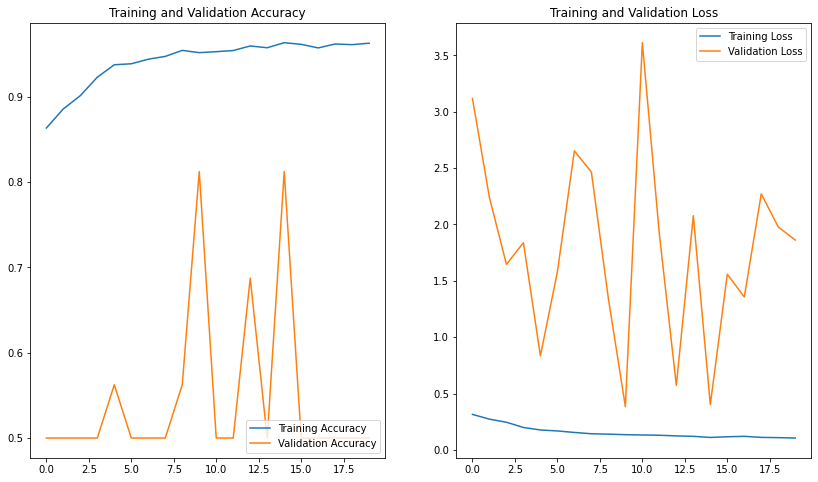

In [84]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [85]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

# model scoring
model.evaluate(test_set)

10/10 [==============================] - 5s 158ms/step - loss: 0.4466 - accuracy: 0.8237


[0.4466111660003662, 0.8237179517745972]